In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


# 한글 폰트 설정 (필요시)
import matplotlib.font_manager as fm

# 나눔고딕 폰트 설정 (시스템에 설치되어 있다고 가정)
try:
    plt.rc('font', family='Malgun Gothic')
    plt.rcParams['axes.unicode_minus'] = False
except:
    print("맑은고딕 폰트가 설치되어 있지 않습니다. 기본 폰트를 사용합니다.")

In [2]:
# 1. 65세 이상 노인 인구 데이터 (2015-2024)
years_elderly = np.array(range(2015, 2025))
elderly_population = np.array([
    12932,
    13255,
    13720,
    14123,
    14557,
    15080,
    15581,
    16265,
    16665,
    17216
])

# 2. 경로당 개수 데이터
years_senior_center = np.array([2017, 2019, 2020, 2021, 2023, 2024])
senior_center_count = np.array([295, 301, 305, 305, 311, 313])  # 해당 연도의 경로당 개수

=== 노인 인구수와 경로당 개수 분석 ===
1. 데이터 확인
노인 인구수 데이터: 10개 (2015-2024)
경로당 개수 데이터: 6개 (2017, 2023, 2024)

2. 2차 스플라인 보간법을 사용한 경로당 개수 데이터 확장
   Year  Elderly_Population  Senior_Center_Interpolated
0  2015               12932                         294
1  2016               13255                         294
2  2017               13720                         295
3  2018               14123                         297
4  2019               14557                         301
5  2020               15080                         305
6  2021               15581                         305
7  2022               16265                         307
8  2023               16665                         311
9  2024               17216                         313

3. 모델 학습 (2015-2022년 데이터 사용)

4. 2023-2024년 예측 결과 및 실제값 비교
   Year  Actual_Elderly  Predicted_Elderly  Elderly_Error
0  2023           16665              16859     193.767857
1  2024           17216              17532     315.982142
   Year  Actual_C

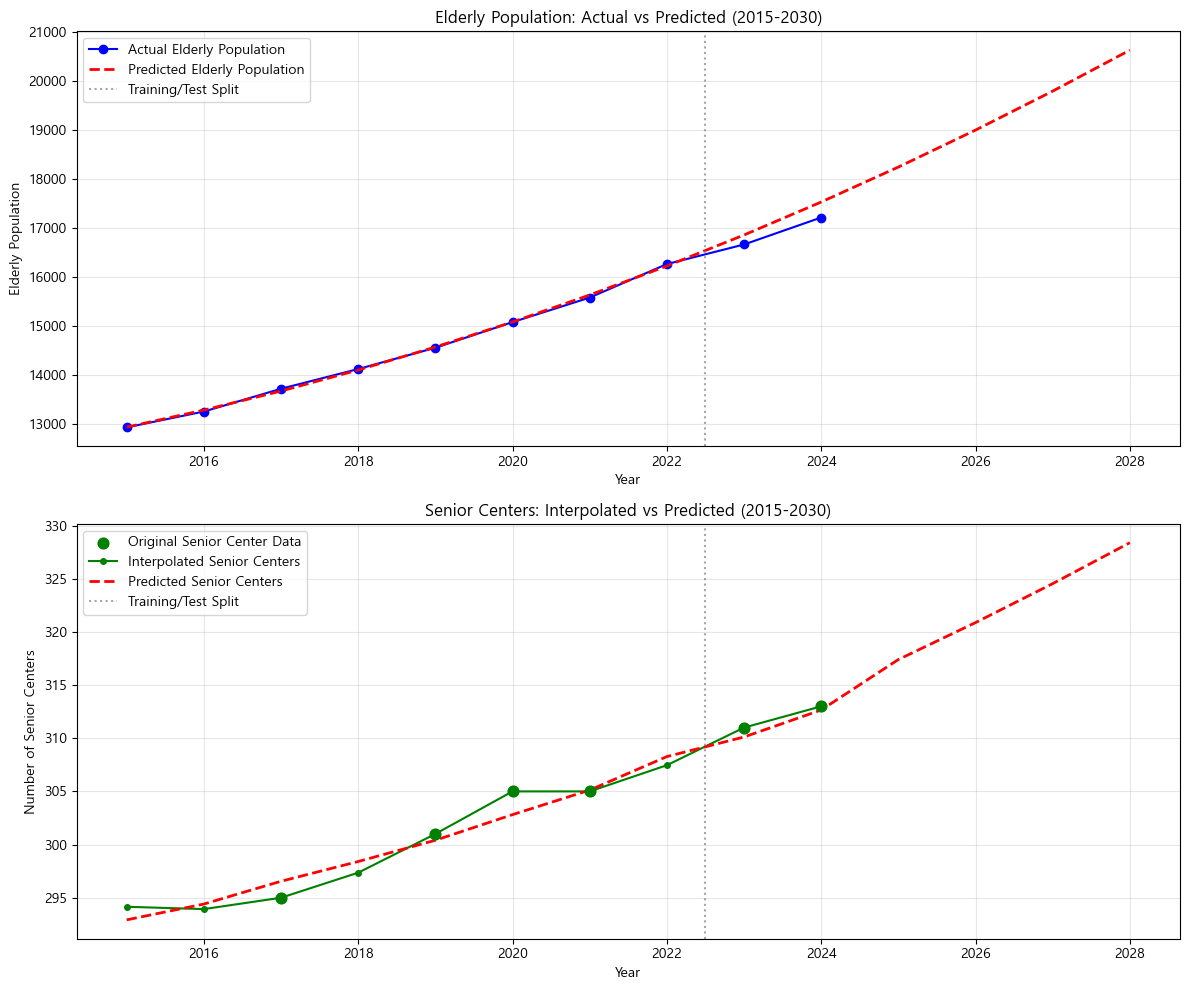


7. 노인 인구수와 경로당 개수의 관계 분석
노인 인구수와 경로당 개수의 상관계수: 0.9733
회귀식: 경로당 개수 = 0.004607 × 노인인구수 + 233.34
노인 1명당 경로당 수: 0.004607개
노인 1000명당 경로당 수: 4.607개


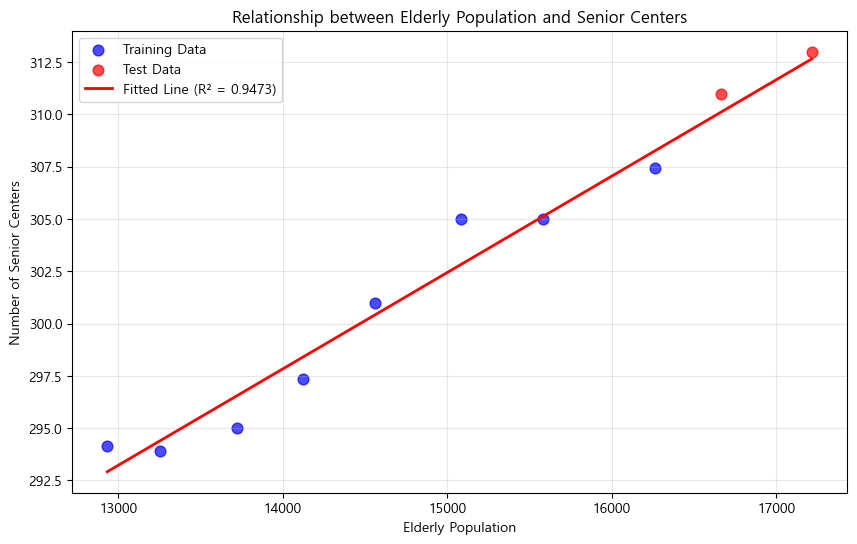


=== 분석 완료 ===


In [3]:
print("=== 노인 인구수와 경로당 개수 분석 ===")
print("1. 데이터 확인")
print(f"노인 인구수 데이터: {len(elderly_population)}개 (2015-2024)")
print(f"경로당 개수 데이터: {len(senior_center_count)}개 (2017, 2023, 2024)")

# 2. 2차 스플라인 보간법을 사용하여 경로당 개수 데이터 확장
print("\n2. 2차 스플라인 보간법을 사용한 경로당 개수 데이터 확장")

# 2차 스플라인 보간 (k=2)
spline = UnivariateSpline(years_senior_center, senior_center_count, k=2, s=0)
senior_center_interpolated = spline(years_elderly)

# 보간 결과 출력
interpolation_df = pd.DataFrame({
    'Year': years_elderly,
    'Elderly_Population': elderly_population,
    'Senior_Center_Interpolated': np.round(senior_center_interpolated).astype(int)
})
print(interpolation_df)

# 3. 2015-2022년 데이터로 모델 학습
print("\n3. 모델 학습 (2015-2022년 데이터 사용)")

# 학습 데이터 준비
train_years = years_elderly[years_elderly <= 2022]
train_elderly = elderly_population[years_elderly <= 2022]
train_centers = senior_center_interpolated[years_elderly <= 2022]

# 테스트 데이터 (2023-2024)
test_years = years_elderly[years_elderly >= 2023]
test_elderly = elderly_population[years_elderly >= 2023]
test_centers = senior_center_interpolated[years_elderly >= 2023]

# 모델 1: 노인 인구수 예측 (시간 기반)
# 다항식 회귀 사용
poly_features_elderly = PolynomialFeatures(degree=2)
X_train_elderly = poly_features_elderly.fit_transform(train_years.reshape(-1, 1))
model_elderly = LinearRegression()
model_elderly.fit(X_train_elderly, train_elderly)

# 모델 2: 경로당 개수 예측 (노인 인구수 기반)
# 선형 회귀 사용
model_centers = LinearRegression()
model_centers.fit(train_elderly.reshape(-1, 1), train_centers)

# 4. 2023-2024년 예측 및 실제값 비교
print("\n4. 2023-2024년 예측 결과 및 실제값 비교")

# 노인 인구수 예측
X_test_elderly = poly_features_elderly.transform(test_years.reshape(-1, 1))
pred_elderly_2023_2024 = model_elderly.predict(X_test_elderly)

# 경로당 개수 예측 (예측된 노인 인구수 기반)
pred_centers_2023_2024 = model_centers.predict(pred_elderly_2023_2024.reshape(-1, 1))

# 결과 비교
comparison_df_1 = pd.DataFrame({
    'Year': test_years,
    'Actual_Elderly': test_elderly,
    'Predicted_Elderly': np.round(pred_elderly_2023_2024).astype(int),
    'Elderly_Error': np.abs(test_elderly - pred_elderly_2023_2024),
})

comparison_df_2 = pd.DataFrame({
    'Year': test_years,    'Actual_Centers': np.round(test_centers).astype(int),
    'Predicted_Centers': np.round(pred_centers_2023_2024).astype(int),
    'Centers_Error': np.abs(test_centers - pred_centers_2023_2024)
})

print(comparison_df_1)
print(comparison_df_2)

# 모델 성능 평가
print("\n=== 모델 성능 평가 ===")
print("노인 인구수 예측:")
print(f"  MAE: {mean_absolute_error(test_elderly, pred_elderly_2023_2024):,.0f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(test_elderly, pred_elderly_2023_2024)):,.0f}")
print(f"  R²: {r2_score(test_elderly, pred_elderly_2023_2024):.4f}")

print("\n경로당 개수 예측:")
print(f"  MAE: {mean_absolute_error(test_centers, pred_centers_2023_2024):.0f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(test_centers, pred_centers_2023_2024)):.0f}")
print(f"  R²: {r2_score(test_centers, pred_centers_2023_2024):.4f}")

# 5. 2025-2030년 미래 예측
print("\n5. 2025-2030년 미래 예측")

future_years = np.array([2025, 2026, 2027, 2028])

# 노인 인구수 예측
X_future_elderly = poly_features_elderly.transform(future_years.reshape(-1, 1))
future_elderly_pred = model_elderly.predict(X_future_elderly)

# 경로당 개수 예측
future_centers_pred = model_centers.predict(future_elderly_pred.reshape(-1, 1))

# 미래 예측 결과
future_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_Elderly_Population': np.round(future_elderly_pred).astype(int),
    'Predicted_Senior_Centers': np.round(future_centers_pred).astype(int)
})
print(future_df)

# 6. 시각화
print("\n6. 결과 시각화")

# 전체 데이터 준비 (과거 + 예측)
all_years = np.concatenate([years_elderly, future_years])
all_elderly_actual = np.concatenate([elderly_population, [np.nan]*len(future_years)])
all_elderly_pred = np.concatenate([
    model_elderly.predict(poly_features_elderly.transform(years_elderly.reshape(-1, 1))),
    future_elderly_pred
])
all_centers_actual = np.concatenate([senior_center_interpolated, [np.nan]*len(future_years)])
all_centers_pred = np.concatenate([
    model_centers.predict(elderly_population.reshape(-1, 1)),
    future_centers_pred
])

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 노인 인구수 그래프
ax1.plot(years_elderly, elderly_population, 'bo-', label='Actual Elderly Population', markersize=6)
ax1.plot(all_years, all_elderly_pred, 'r--', label='Predicted Elderly Population', linewidth=2)
ax1.axvline(x=2022.5, color='gray', linestyle=':', alpha=0.7, label='Training/Test Split')
ax1.set_xlabel('Year')
ax1.set_ylabel('Elderly Population')
ax1.set_title('Elderly Population: Actual vs Predicted (2015-2030)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 경로당 개수 그래프
ax2.scatter(years_senior_center, senior_center_count, color='green', s=60, label='Original Senior Center Data', zorder=5)
ax2.plot(years_elderly, senior_center_interpolated, 'go-', label='Interpolated Senior Centers', markersize=4)
ax2.plot(all_years, all_centers_pred, 'r--', label='Predicted Senior Centers', linewidth=2)
ax2.axvline(x=2022.5, color='gray', linestyle=':', alpha=0.7, label='Training/Test Split')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Senior Centers')
ax2.set_title('Senior Centers: Interpolated vs Predicted (2015-2030)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. 관계 분석
print("\n7. 노인 인구수와 경로당 개수의 관계 분석")

# 상관계수 계산
correlation = np.corrcoef(train_elderly, train_centers)[0, 1]
print(f"노인 인구수와 경로당 개수의 상관계수: {correlation:.4f}")

# 회귀 계수
slope = model_centers.coef_[0]
intercept = model_centers.intercept_
print(f"회귀식: 경로당 개수 = {slope:.6f} × 노인인구수 + {intercept:.2f}")
print(f"노인 1명당 경로당 수: {slope:.6f}개")
print(f"노인 1000명당 경로당 수: {slope*1000:.3f}개")

# 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(train_elderly, train_centers, color='blue', alpha=0.7, s=60, label='Training Data')
plt.scatter(test_elderly, test_centers, color='red', alpha=0.7, s=60, label='Test Data')
elderly_range = np.linspace(train_elderly.min(), max(train_elderly.max(), test_elderly.max()), 100)
centers_fitted = model_centers.predict(elderly_range.reshape(-1, 1))
plt.plot(elderly_range, centers_fitted, 'r-', linewidth=2, label=f'Fitted Line (R² = {r2_score(train_centers, model_centers.predict(train_elderly.reshape(-1, 1))):.4f})')
plt.xlabel('Elderly Population')
plt.ylabel('Number of Senior Centers')
plt.title('Relationship between Elderly Population and Senior Centers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n=== 분석 완료 ===")